# <center> STATS 607 - LECTURE 12
## <center> 10/17/2018

# Scipy

SciPy make available a number of mathematical algorithms and convenience functions. It is built on the Numpy extension of Python and it adds significant power to a Python session by providing the user with high-level commands and classes for manipulating and visualizing data. SciPy on Python also makes a powerful programming language available for the development of specialized applications. See more [here](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html).

SciPy is organized into subpackages covering different scientific computing domains:

* cluster - Clustering algorithms
* constants - Physical and mathematical constants
* fftpack - Fast Fourier Transform routines
* integrate - Integration and ordinary differential equation solvers
* interpolate - Interpolation and smoothing splines
* io - Input and Output
* linalg - Linear algebra
* ndimage - N-dimensional image processing
* odr - Orthogonal distance regression
* optimize - Optimization and root-finding routines
* signal - Signal processing
* sparse - Sparse matrices and associated routines
* spatial - Spatial data structures and algorithms
* special - Special functions
* stats - Statistical distributions and functions

## Basic functions - Interaction with Numpy

Scipy builds on Numpy, and for all basic array handling needs you can use Numpy functions:

In [1]:
import numpy as np

### Index Tricks

The following are example of added functionality to provide efficient means for array construction:

In [2]:
a = np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))
a

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

Now we rewrite the above in a different way. See how objects are concatenated and the slicing syntax is (ab)used to construct ranges:

In [3]:
a = np.r_[3,[0]*5,-1:1:10j] # "r" stands for row concatenation.
a

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

Translates slice objects to concatenation along the first axis. This is a simple way to build up arrays quickly. There are two use cases:

* If the index expression contains comma separated arrays, then stack
   them along their first axis.
* If the index expression contains slice notation or scalars then create
   a 1-D array with a range indicated by the slice notation.

In [4]:
np.r_[[1,2,3], [4,5,6]] # Row concatenation.

array([1, 2, 3, 4, 5, 6])

In [5]:
np.c_[[1,2,3], [4,5,6]] # Column concatenation.

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
a = np.array([[0, 1, 2], [3, 4, 5]]) # Concatenate along first axis.
np.r_[a, a]

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [7]:
np.r_['1', a, a] # Concatenate along the second axis.

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

In [8]:
np.c_[a, a] # The same as above.

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5]])

### Polynomials

In [9]:
from numpy import poly1d

In [10]:
p = poly1d([3,4,5]) # Create the polynomial.
p

poly1d([3, 4, 5])

In [11]:
print(p)

   2
3 x + 4 x + 5


In [12]:
p.coefficients # Obtain the polynomial coefficients.

array([3, 4, 5])

In [13]:
p*p # Multiply the polynomial by itself.

poly1d([ 9, 24, 46, 40, 25])

In [14]:
p.deriv() # Obtain the derivative.

poly1d([6, 4])

### Vectorizing functions

One of the features that NumPy provides is a class vectorize to convert an ordinary Python function which accepts scalars and returns scalars into a “vectorized-function” with the same broadcasting rules as other Numpy functions. The vectorize function is provided primarily for convenience, not for performance. The implementation is essentially a for loop.

In [15]:
def addsubtract(a,b):
    """This is the addsubtract function"""
    if a > b:
        return a - b
    else:
        return a + b

In [16]:
vec_addsubtract = np.vectorize(addsubtract) # Vectorizes the function.

In [17]:
vec_addsubtract

In [18]:
vec_addsubtract([0,3,6,9],[1,3,5,7]) # Notice that 'vec_addsubtract' is another function.

array([1, 6, 1, 2])

In [19]:
vec_addsubtract([0,3,6,9],10) # As with Numpy objects, broadcasting rules apply here as well.

array([10, 13, 16, 19])

In [20]:
vec_addsubtract([0,3,6,9],[10,2]) # Broadcasting rules do not apply in this particular case.

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

### Other useful functions

In [22]:
np.linspace(2.0, 3.0, num=5) # Return evenly spaced numbers over a specified interval.

array([2.  , 2.25, 2.5 , 2.75, 3.  ])

In [23]:
np.linspace(2.0, 3.0, num=5, endpoint=False) # Endpoint is not part of the result.

array([2. , 2.2, 2.4, 2.6, 2.8])

In [24]:
np.linspace(2.0, 3.0, num=5, retstep=True) # We are also returning the step.

(array([2.  , 2.25, 2.5 , 2.75, 3.  ]), 0.25)

In [27]:
np.logspace(1, 5, num=10)

array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])

In [28]:
x = np.arange(9.).reshape(3, 3) # To use for the example.
x

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [29]:
np.where(x>5) # Finds the values and indices for which condition is true.

(array([2, 2, 2]), array([0, 1, 2]))

Now lets see "select". "select" is a vectorized form of the multiple if-statement. It allows rapid construction of a function which returns an array of results based on a list of conditions. Each element of the return array is taken from the array in a choicelist corresponding to the first condition in condlist that is true.

In [30]:
x = np.arange(-2,3) # Simple unidimensional array.
x

array([-2, -1,  0,  1,  2])

In [31]:
[x+1,x+2] # Just so we can see exactly what are the values of the choice list we'll be dealing with.

[array([-1,  0,  1,  2,  3]), array([0, 1, 2, 3, 4])]

In [32]:
x<0 # Just so we can see exactly what are the values of the 1st boolean condition we'll be dealing with.

array([ True,  True, False, False, False])

In [33]:
x>=0 # Just so we can see exactly what are the values of the 2nd boolean condition we'll be dealing with.

array([False, False,  True,  True,  True])

In [34]:
np.select([x < 0, x >= 0], [x+1, x+2]) # Select statement.

array([-1,  0,  2,  3,  4])

## Integration

Scipy sub-packages need to be imported separately, so lets do that for integration functions:

In [35]:
from scipy import integrate

In [36]:
def integrand(x, a, b):
    """
    """
    return a*x**2 + b

In [37]:
a = 2
b = 1
I = integrate.quad(integrand, 0, 1, args=(a,b)) # 'args' allow for setting additional arguments to "integrand".
I

(1.6666666666666667, 1.8503717077085944e-14)

## Optimize

In [38]:
from scipy import optimize

In [39]:
def square(x):
    """
    """
    return x**2

In [41]:
minimum = optimize.minimize(square, 1, method = 'BFGS') # Minimization of scalar function of one or more variables.

In [42]:
minimum

      fun: 5.5507930986288555e-17
 hess_inv: array([[0.5]])
      jac: array([4.32220232e-13])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([-7.45036449e-09])

In [43]:
minimum.x

array([-7.45036449e-09])

## Interpolation

In [44]:
from scipy import interpolate

In [45]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(-x**3/4)
f = interpolate.interp1d(x, y) # Interpolation function - default is linear interpolation.
f2 = interpolate.interp1d(x, y, kind='cubic') # You can also specify a method.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

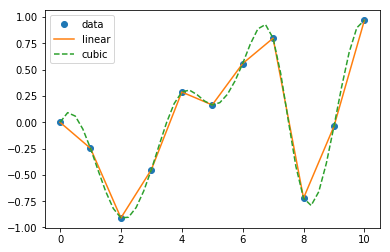

In [47]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

# Matplotlib

In [48]:
# Create x and y for plotting example
x_vals = np.arange(1, 11)
y_vals = x_vals**2

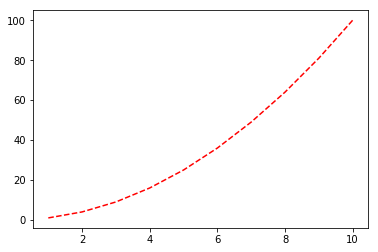

In [49]:
plt.plot(x_vals,y_vals,'r--');

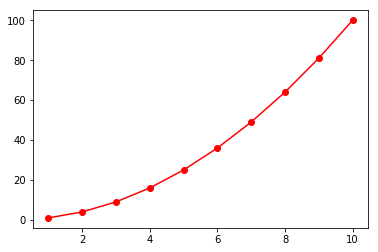

In [50]:
plt.plot(x_vals,y_vals,'ro-'); # You have available a number of colors and markers to do this.

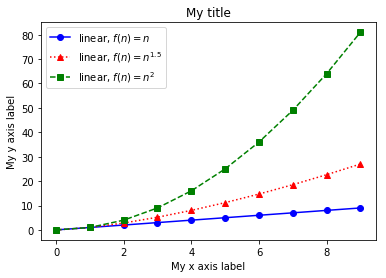

In [51]:
x_vals = np.arange(0,10)
plt.plot(x_vals, x_vals, '-ob', label='linear, $f(n)=n$') # Use 'label' for legend label.
plt.plot(x_vals, x_vals**1.5,':^r', label='linear, $f(n)=n^{1.5}$')
plt.plot(x_vals, x_vals**2, '--sg', label='linear, $f(n)=n^2$');
plt.xlabel("My x axis label")  # Set the label for the x axis.
plt.ylabel("My y axis label") # Set the label for the y axis.
plt.title("My title")  # Set the plot title.
plt.legend(loc='best');

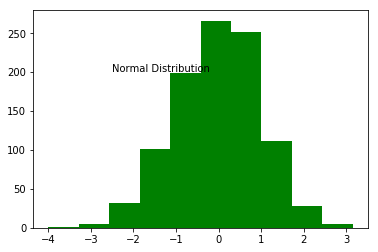

In [52]:
samples = np.random.normal(size=1000) # Samples from a normal distribution.
n, bins, patches = plt.hist(samples, bins=10, facecolor='g') # Create an histogram.
plt.text(-2.5, 200, 'Normal Distribution', fontsize=10);  # Add text at specified position.

In [53]:
print(n) # Number of elements in each bin.
print(bins) # The actual bin marks.

[  1.   5.  32. 101. 199. 266. 251. 112.  28.   5.]
[-3.99736053 -3.28237641 -2.5673923  -1.85240819 -1.13742407 -0.42243996
  0.29254415  1.00752827  1.72251238  2.43749649  3.15248061]


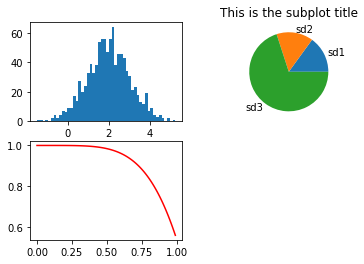

In [54]:
fig = plt.figure()   # Create an empty figure.
sub1 = fig.add_subplot(2, 2, 1)  # Notice we are creating a 2x2 plot.
sub2 = fig.add_subplot(2, 2, 2)  # 2nd one.
sub3 = fig.add_subplot(2, 2, 3)  # 3rd one.
x_vals = np.arange(0, 1, .01)
plt.plot(x_vals, np.cos(x_vals**2.5), '-r')  # Plots on last subplot handle.
sub1.hist(np.random.normal(2, size=1000), bins=50)  # Plots on subplot 1.
sub2.pie([15, 15, 70], labels=['sd1', 'sd2', 'sd3'])  # Plots on subplot 2.
sub2.set_title('This is the subplot title');  # Set title for only subplot 2.